# CSE 258, Fall 2019: Homework 1
## Kristoffer Gjerde

Dataset is downloaded from https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Gift_Card_v1_00.tsv.gz   
It is a TSV formated dataset, including reviews from one of the smaller Amazon categories. 

In [2]:
import numpy as np
import urllib
import scipy.optimize
import random
import gzip

In [20]:
path = "./resources/amazon_reviews_us_Gift_Card_v1_00.tsv.gz"
f = gzip.open(path, "rt", encoding="utf8")

In [21]:
dataset = []
header = f.readline().strip().split("\t")
for line in f:
    line = line.split("\t")
    d = dict(zip(header, line))
    d['star_rating'] = int(d['star_rating'])
    # Here you can also select only the fields you want to use
    #fields = [...]
    #d2 = {field: d[field] for field in fields}
    dataset.append(d)

In [24]:
dataset[0]

{'marketplace': 'US',
 'customer_id': '24371595',
 'review_id': 'R27ZP1F1CD0C3Y',
 'product_id': 'B004LLIL5A',
 'product_parent': '346014806',
 'product_title': 'Amazon eGift Card - Celebrate',
 'product_category': 'Gift Card',
 'star_rating': 5,
 'helpful_votes': '0',
 'total_votes': '0',
 'vine': 'N',
 'verified_purchase': 'Y',
 'review_headline': 'Five Stars',
 'review_body': 'Great birthday gift for a young adult.',
 'review_date': '2015-08-31\n'}

### Task 1 
What is the distribution of ratings in the dataset? That is, how many 1-star, 2-star, 3-star (etc.) reviews are there? You may write out the values or include a simple plot.

In [26]:
from collections import defaultdict
# First let us get the counts
ratings_count = defaultdict(int)
for d in dataset:
    ratings_count[d['star_rating']] += 1
ratings_count

defaultdict(int, {5: 129709, 1: 4793, 4: 9859, 2: 1569, 3: 3156})

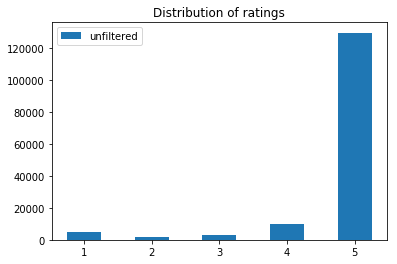

In [86]:
import matplotlib.pyplot as plt
def categorical_plot(names, *dicts):
    #plt.figure(figsize=(10, 5))
    plt.title('Distribution of ratings')
    for i, d in enumerate(dicts):
        items = sorted(d.items()) 
        category, value = zip(*items)
        plt.bar(category, value, width=0.5, label=names[i])
    plt.legend(loc='best')
    plt.show()

categorical_plot(["unfiltered"], ratings_count)

### Task 2
Repeat the above question, but generate the distribution (a) only for reviews that are ‘verified,’ and (b) only for reviews that are not verified. Write out the values or generate a plot to show
the difference between these distributions.

In [87]:
ratings_count_verified, ratings_count_notverified = defaultdict(int), defaultdict(int)
for d in dataset:
    if d['verified_purchase'] == 'Y':
        ratings_count_verified[d['star_rating']] += 1
    else:
        ratings_count_notverified[d['star_rating']] += 1
ratings_count_verified, ratings_count_notverified

(defaultdict(int, {5: 118974, 1: 4000, 4: 8940, 2: 1344, 3: 2784}),
 defaultdict(int, {5: 10735, 4: 919, 3: 372, 1: 793, 2: 225}))

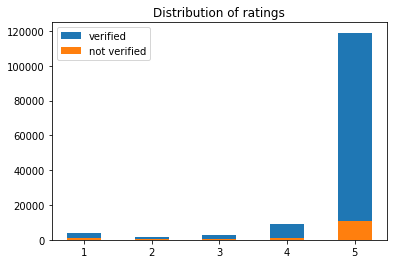

In [88]:
categorical_plot(["verified", "not verified"], ratings_count_verified, ratings_count_notverified)

### Task 3
Train a simple predictor to predict the star rating using two features.
Report the values of θ0, θ1, and θ2. Briefly describe your interpretation of these values, i.e., what do θ0,
θ1, and θ2 represent? Explain these in terms of the features and labels, e.g. if the coefficient of ‘review
length’ is negative, what would that say about verified versus unverified reviews 

In [92]:
def feature(datum):
    return [1, datum['verified_purchase'] == 'Y', len(datum['review_body'])]
    
    
X = [feature(d) for d in dataset]
y = [d['star_rating'] for d in dataset]
theta,residuals,rank,s = np.linalg.lstsq(X, y)
theta

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


array([ 4.84461817e+00,  5.04148265e-02, -1.24659895e-03])

### Task 4
Train another predictor that only uses one feature. Report the values of θ0 and θ1. Note that coefficient you found here might be quite different (i.e., much
larger or smaller) than the one from Question 3, even though these coefficients refer to the same feature.
Provide an explanation as to why these coefficients might vary so significantly

In [93]:
def feature(datum):
    return [1, datum['verified_purchase'] == 'Y']
    
X = [feature(d) for d in dataset]
y = [d['star_rating'] for d in dataset]
theta,residuals,rank,s = np.linalg.lstsq(X, y)
theta

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


array([4.57758356, 0.16852426])